# Differentiable Programming 101

# Differentiable Programming 101

We study some initial examples of

-   numerical differentiation
-   symbolic differentiation
-   automatic differentiation

# Numerical Differentiation

Consider the sine function and its derivative,

$$ f(x) = \sin(x), \quad f'(x)=\cos (x) $$

evaluated at the point $x = 0.1.$

In [1]:
import numpy as np
f = lambda x: np.sin(x)
x0 = 0.1
exact = np.cos(x0)
print("True derivative:", exact)
print("Forward Difference\tError\t\t\tCentral Difference\tError\n")
for i in range(10):
    h = 1/(10**i)
    f1 = (f(x0+h)-f(x0))/h
    f2 = (f(x0+h)-f(x0-h))/(2*h)
    e1 = np.abs(f1 - exact)
    e2 = np.abs(f2 - exact)
    print('%.5e\t\t%.5e\t\t%.5e\t\t%.5e'%(f1,e1,f2,e2))

True derivative: 0.9950041652780258
Forward Difference  Error           Central Difference  Error

7.91374e-01     2.03630e-01     8.37267e-01     1.57737e-01
9.88359e-01     6.64502e-03     9.93347e-01     1.65751e-03
9.94488e-01     5.15746e-04     9.94988e-01     1.65833e-05
9.94954e-01     5.00825e-05     9.95004e-01     1.65834e-07
9.94999e-01     4.99333e-06     9.95004e-01     1.65828e-09
9.95004e-01     4.99183e-07     9.95004e-01     1.66720e-11
9.95004e-01     4.99136e-08     9.95004e-01     2.10021e-12
9.95004e-01     4.96341e-09     9.95004e-01     3.25943e-11
9.95004e-01     1.06184e-10     9.95004e-01     1.06184e-10
9.95004e-01     2.88174e-09     9.95004e-01     2.88174e-09

# Symbolic Differentiation

Though very useful in simple cases, symbolic differentiation often leads
to complex and redundant expressions. In addition, balckbox routines
cannot be differentiated.

In [2]:
from sympy import *
x = symbols('x')
#
diff(cos(x), x)

In [3]:
# a more complicated esxpression
def sigmoid(x):
  return 1 / (1 + exp(-x))

diff(sigmoid(x),x)

Note that the derivative of $$ \sigma(x) = \frac{1}{1+e^{-x}}$$ can be
simply written as $$ \frac{d\sigma }{dx}= (1-\sigma(x)) \sigma(x)$$

In [4]:
# much more complicated
x,w1,w2,w3,b1,b2,b3 = symbols('x w1 w2 w3 b1 b2 b3')
y = w3*sigmoid(w2*sigmoid(w1*x + b1) + b2) + b3
diff(y, w1)

In [5]:
dydw1 = diff(y, w1)
print(dydw1)

w2*w3*x*exp(-b1 - w1*x)*exp(-b2 - w2/(exp(-b1 - w1*x) + 1))/((exp(-b1 - w1*x) + 1)**2*(exp(-b2 - w2/(exp(-b1 - w1*x) + 1)) + 1)**2)

# Automatic Differentiation

Here we show the simplicity and efficiency of `autograd` from `numpy`.

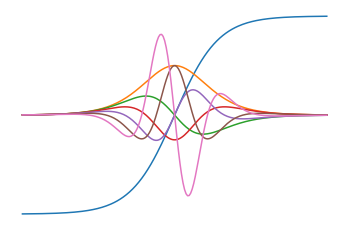

In [6]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import elementwise_grad as egrad  # for functions that vectorize over inputs

# We could use np.tanh, but let's write our own as an example.
def tanh(x):
    return (1.0 - np.exp(-x))  / (1.0 + np.exp(-x))

x = np.linspace(-7, 7, 200)
plt.plot(x, tanh(x),
         x, egrad(tanh)(x),                                # first  derivative
         x, egrad(egrad(tanh))(x),                          # second derivative
         x, egrad(egrad(egrad(tanh)))(x),                    # third  derivative
         x, egrad(egrad(egrad(egrad(tanh))))(x),              # fourth derivative
         x, egrad(egrad(egrad(egrad(egrad(tanh)))))(x),        # fifth  derivative
         x, egrad(egrad(egrad(egrad(egrad(egrad(tanh))))))(x))  # sixth  derivative

plt.axis('off')
plt.savefig("tanh.png")
plt.show()

In [7]:
from autograd import grad
grad_tanh = grad(tanh)            # Obtain its gradient function
gA = grad_tanh(1.0)               # Evaluate the gradient at x = 1.0
gN = (tanh(1.01) - tanh(0.99)) / 0.02  # Compare to finite differences
print(gA, gN)

0.39322386648296376 0.3932226889551027